# Logistic Regression Analysis of Car Insurance Claims

This project analyzes car insurance data to identify which customer features are most predictive of insurance claim outcomes.

Logistic regression models are fitted to evaluate the individual predictive power of each feature.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from statsmodels.formula.api import logit


In [2]:
car_insurance = pd.read_csv(
    "../data/car_insurance.csv"
)

car_insurance.head()


,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## Data Overview

We begin by inspecting the structure and basic properties of the dataset.


In [3]:
car_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [4]:
car_insurance.describe()


,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Missing Data Analysis

Some variables contain missing values, which need to be addressed before modeling.


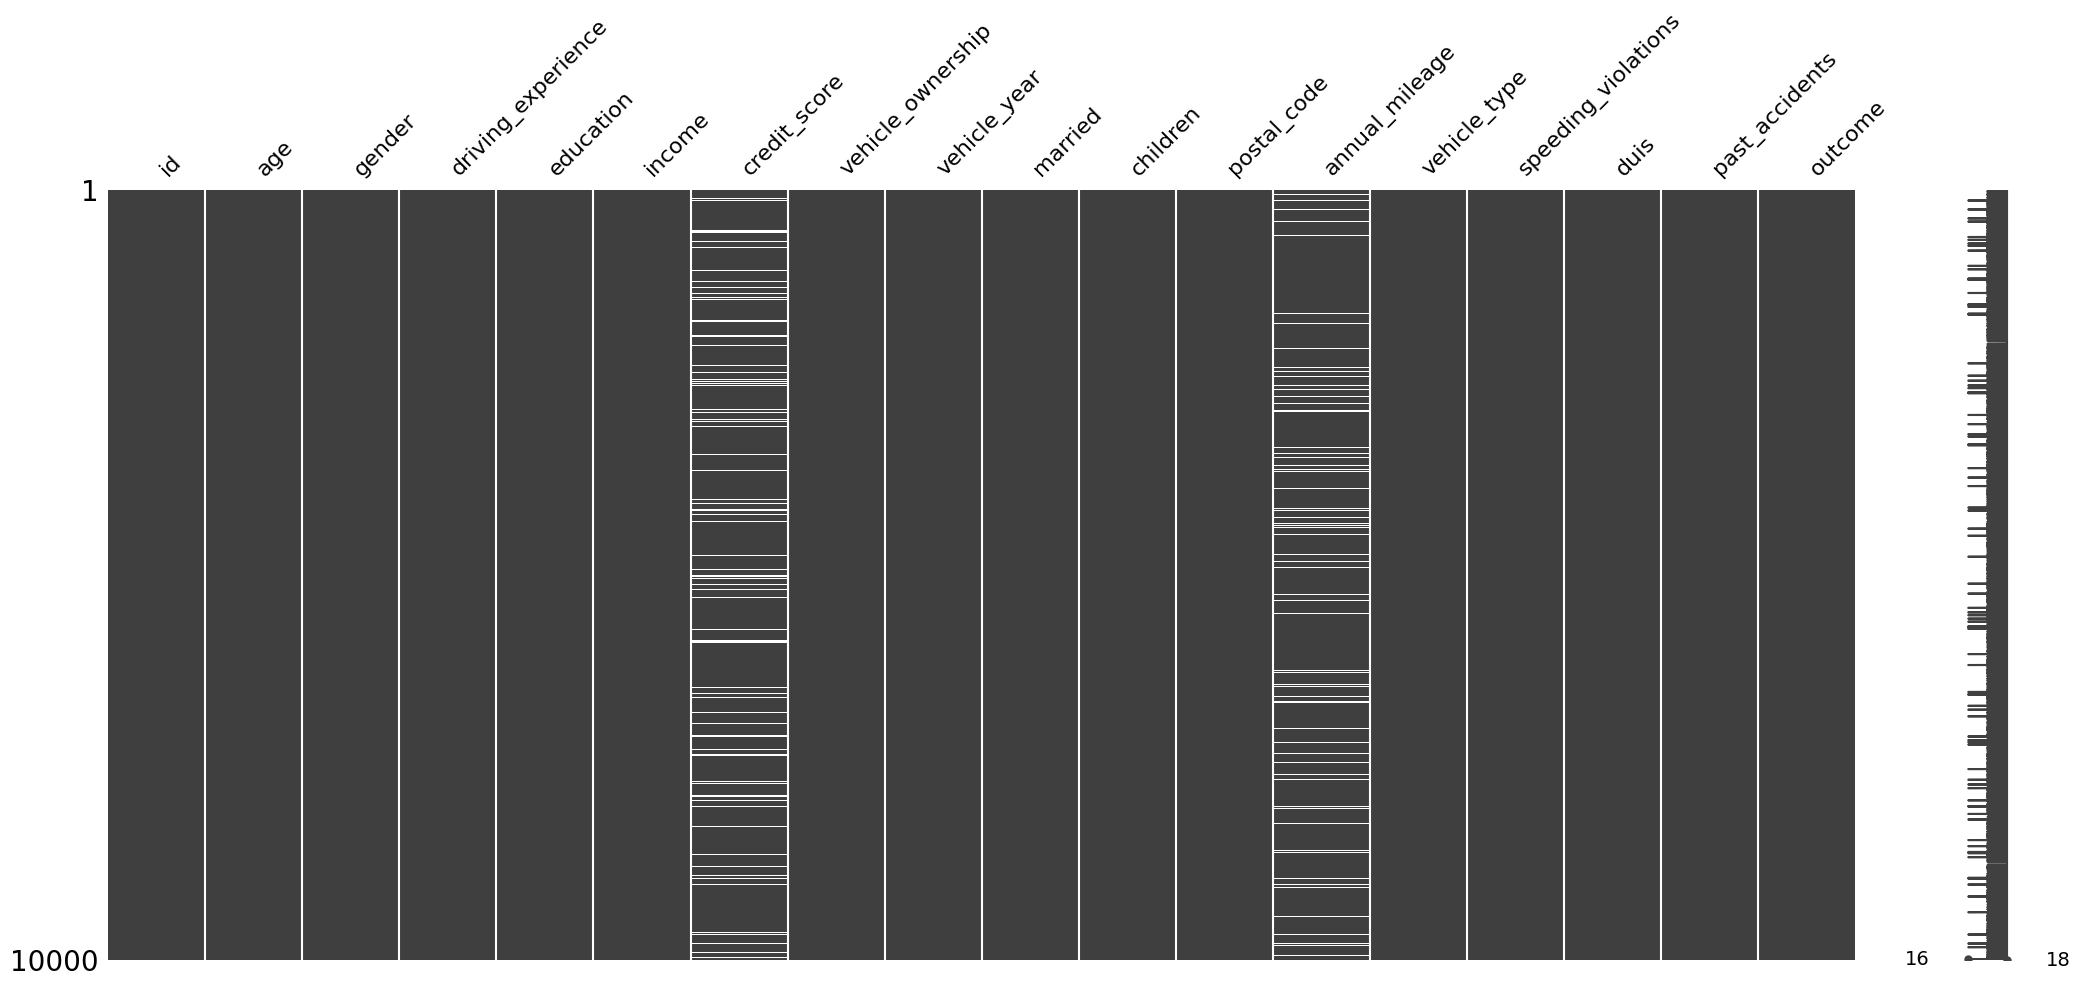

In [5]:
msno.matrix(car_insurance)
plt.show()


## Handling Missing Values

Missing values in numerical variables are imputed using the mean value of each feature.


In [6]:
car_insurance_filled = car_insurance.fillna({
    "credit_score": car_insurance["credit_score"].mean(),
    "annual_mileage": car_insurance["annual_mileage"].mean()
})

car_insurance_filled.isna().sum()


id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

## Logistic Regression Modeling

Separate logistic regression models are fitted for each feature to assess its individual predictive power on claim outcomes.


In [7]:
features = car_insurance_filled.drop(["id", "outcome"], axis=1)


In [8]:
models = []

for col in features.columns:
    model = logit(f"outcome ~ {col}", data=car_insurance_filled).fit(disp=False)
    models.append(model)

len(models)


16

## Model Evaluation

Model performance is evaluated using classification accuracy derived from the confusion matrix.


In [9]:
accuracies = []

for model in models:
    conf_matrix = model.pred_table()
    
    tn, fp = conf_matrix[0]
    fn, tp = conf_matrix[1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracies.append(accuracy)

results = pd.DataFrame({
    "Feature": features.columns,
    "Accuracy": accuracies
}).sort_values(by="Accuracy", ascending=False)

results


,Feature,Accuracy
2,driving_experience,0.7771
0,age,0.7747
4,income,0.7425
6,vehicle_ownership,0.7351
5,credit_score,0.7054
11,annual_mileage,0.6904
3,education,0.6867
1,gender,0.6867
7,vehicle_year,0.6867
8,married,0.6867


## Best Predictive Feature

The feature with the highest classification accuracy is identified as the strongest individual predictor of insurance claim outcomes.


In [10]:
best_feature = results.iloc[0]
best_feature


Feature     driving_experience
Accuracy                0.7771
Name: 2, dtype: object

## Conclusions

- Logistic regression models were fitted for each feature independently.
- Driving experience showed the highest predictive power among all variables.
- This analysis highlights the importance of behavioral variables in insurance risk modeling.
